In [14]:
import sys, os
# os.environ['PATH']='/projects/bdne/spandey3/tex/texlive/bin/x86_64-linux:'+ os.environ['PATH']
# os.environ['PYTHONPATH']='/projects/bdne/spandey3/tex/texlive/bin/x86_64-linux:'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']='.9'
import jax_cosmo.background as bkgrd
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from jax.lib import xla_bridge
platform = xla_bridge.get_backend().platform
import jax
print(jax.local_device_count(), jax.device_count())
jax.config.update('jax_platform_name', platform)
jax.config.update("jax_enable_x64", True)
import jax
# Change the current working directory to the desired path
# os.chdir('/mnt/home/spandey/ceph/GODMAX/src/')

import matplotlib

import matplotlib.pyplot as pl
# set latex to false:
pl.rcParams['text.usetex'] = False
%load_ext autoreload
%autoreload 2
import pathlib
curr_path = pathlib.Path().absolute()
abs_path_data = os.path.abspath(curr_path / "../data/") 
abs_path_src = os.path.abspath(curr_path / "../src/") 
abs_path_results = os.path.abspath(curr_path / "../results/") 
sys.path.append((curr_path))
sys.path.append((abs_path_data))
sys.path.append((abs_path_results))
sys.path.append(abs_path_src)
import numpyro
numpyro.set_platform("gpu")
numpyro.enable_x64()
from jax import config
config.update("jax_enable_x64", True)
import scipy.interpolate as interp
import pickle as pk
import numpy as np
import jax.numpy as jnp
import colossus 
from jax import vmap, grad, pmap
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
# pl.rc('font', family='DejaVu Sans')

%matplotlib inline

1 1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_1284471/71223711.py:8: DeprecationWarning: jax.lib.xla_bridge.get_backend is deprecated; use jax.extend.backend.get_backend.
  platform = xla_bridge.get_backend().platform


In [6]:
# cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 'w0':-1.0}
import pyccl as ccl
cosmo = ccl.Cosmology(
    Omega_c=0.31-0.049, Omega_b=0.049, h=0.672, sigma8=0.81, n_s=0.95,
    transfer_function='eisenstein_hu')

k_array_ccl = np.logspace(-4, 2, 100)
z = 0.0
pkz_HF_ccl = ccl.nonlin_matter_power(cosmo, k=k_array_ccl, a=1/(1+z))

from pyccl.halos.profiles import nfw
from pyccl.halos.profiles import pressure_gnfw
from pyccl.halos.concentration import duffy08






In [7]:
conc_model_ccl = duffy08.ConcentrationDuffy08()
nfw_prof_ccl = nfw.HaloProfileNFW(mass_def='200c',concentration=conc_model_ccl)



In [8]:
r_array = np.logspace(-2, 0, 100)
z_test = 0.0
h = cosmo['h']
M_test = 1.07710506e+14
conc = conc_model_ccl._concentration(cosmo,M_test/h,1/(1+z_test))



In [9]:
prof_test_ccl = nfw_prof_ccl._real(cosmo,r_array/h,M_test/h,1/(1+z_test))/(h**2)



In [10]:
# cosmo_params_dict = {'flat': True, 'H0': 70.0, 'Om0': 0.2793, 'Ob0': 0.0463, 'sigma8': 0.821, 'ns': 0.972, 'w0':-1.0}
# cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 'w0':-1.0}
cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.29, 'Ob0': 0.049, 'sigma8': 0.783, 'ns': 0.95, 'w0':-1.0}
sim_params_dict = {}
sim_params_dict['nfw_trunc'] = True
sim_params_dict['gamma_rhogas'] = 2.0
sim_params_dict['delta_rhogas'] = 7.0
# sim_params_dict['theta_co'] = 0.01
# sim_params_dict['theta_ej'] = 1.0

sim_params_dict['theta_co_0'] = 0.1
sim_params_dict['log10_Mstar0_theta_co'] = 15.0
sim_params_dict['nu_theta_co_M'] = 0.0
sim_params_dict['nu_theta_co_z'] = 0.0

sim_params_dict['theta_ej_0'] = 2.75
sim_params_dict['log10_Mstar0_theta_ej'] = 15.0
sim_params_dict['nu_theta_ej_M'] = 0.0
sim_params_dict['nu_theta_ej_z'] = 0.0

sim_params_dict['log10_Mc0'] = 14.83
sim_params_dict['log10_Mstar0'] = 14.0
sim_params_dict['mu_beta'] = 0.21
sim_params_dict['nu_z'] = 0.0
sim_params_dict['nu_M'] = 0.0

sim_params_dict['eta_star'] = 0.3
sim_params_dict['eta_cga'] = 0.6


sim_params_dict['neg_bhse_plus_1'] = 0.833
sim_params_dict['A_starcga'] = 0.09
sim_params_dict['log10_M1_starcga'] = 11.4
sim_params_dict['epsilon_rt'] = 4.0


sim_params_dict['a_zeta'] = 0.3
sim_params_dict['n_zeta'] = 2
sim_params_dict['alpha_nt'] = 0.18
sim_params_dict['beta_nt'] = 0.5
sim_params_dict['n_nt'] = 0.3
sim_params_dict['cosmo'] = cosmo_params_dict


halo_params_dict = {}
halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 12, 96
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 1.0, 10
# halo_params_dict['z_array'] = np.array([1e-3, 0.5, 1.0])
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.01, 3.0, 20
halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.01, 3.0, 24
# halo_params_dict['z_array'] = np.array([1e-3])
# halo_params_dict['z_array'] = np.array([0.5])
# halo_params_dict['z_array'] = np.array([1.0])
# halo_params_dict['nz'] = len(halo_params_dict['z_array'])
# halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 12.0, 15.5, 20
halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 11.5, 15.5, 128
# halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 2, 9, 16

lmin = 1.0
lmax = 60000.0
fac = 1
dl_log_array = 0.23025851 / fac
# dl_log_array = 0.1
l_array_all = np.exp(np.arange(np.log(lmin), np.log(lmax), dl_log_array))
dl_array = l_array_all[1:] - l_array_all[:-1]
l_array_survey = (l_array_all[1:] + l_array_all[:-1]) / 2.
halo_params_dict['ell_array'] = jnp.array(l_array_survey)
halo_params_dict['nell'] = len(l_array_survey)
halo_params_dict['ellmin'] = l_array_survey[0]
halo_params_dict['ellmax'] = l_array_survey[-1]
# halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**14, 32
# try:
halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.05
halo_params_dict['mdef'] = '200c'
halo_params_dict['hmf_model'] = 'T10'
# halo_params_dict['conc_model'] = 'Diemer15'
halo_params_dict['conc_model'] = 'Duffy08'
halo_params_dict['do_corr_2h_mm'] = True

# halo_params_dict['do_corr_2h_mm'] = False

from astropy.io import fits
df = fits.open(os.path.abspath(abs_path_data + '/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'))
# df = fits.open('data/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits') 
z_array = df['nz_source'].data['Z_MID']
nz_info_dict = {}
nz_info_dict['z_array'] = z_array
nz_info_dict['nbins'] = 4
nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
# nz_info_dict['nz4'] = np.maximum(df['nz_source'].data['BIN5'], 1e-4)
analysis_dict = {}
analysis_dict['nz_info_dict'] = nz_info_dict
analysis_dict['do_sheary'] = True
analysis_dict['do_shear2pt'] = True
analysis_dict['do_yy'] = True

analysis_dict['fsky_yy'] = 0.1
analysis_dict['fsky_ky'] = 0.1
analysis_dict['fsky_kk'] = 0.1
analysis_dict['fac_ell_hres'] = fac

# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits')
# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits')
theta_data = df['xip'].data['ANG'][0:20]

# analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
analysis_dict['angles_data_array'] = jnp.array(theta_data)
analysis_dict['beam_fwhm_arcmin'] = 1.6
analysis_dict['want_like_diff'] = True
analysis_dict['calc_nfw_only'] = False
analysis_dict['conc_dep_model'] = False


analysis_dict['get_cov'] = True
# analysis_dict['stats_for_cov'] = ['ky']
analysis_dict['stats_for_cov'] = ['ky', 'kk']
analysis_dict['analysis_coords'] = 'real'
# l_array_survey = np.logspace(np.log10(lmin), np.log10(lmax), int((lmax-lmin)/dl_log_array)+1)
analysis_dict['l_array_survey'] = jnp.array(l_array_survey)
analysis_dict['dl_array_survey'] = jnp.array(dl_array)
# analysis_dict['yy_total_ell_fname'] = '/Users/shivam/Downloads/ACT_Cls/Cls_ilc_SZ_deproj_cib_cibdBeta_1.7_10.7_yy_apod10arcmin_21Mar24.txt'
# analysis_dict['yy_total_ell_fname'] = '/Users/shivam/Downloads/ACT_Cls/Cls_ilc_SZ_yy_apod10arcmin_21Mar24.txt'
analysis_dict['yy_total_ell_fname'] = os.path.abspath(abs_path_data + '/DESxACT/ACT_Cls/Cls_ilc_SZ_yy_apod10arcmin_21Mar24.txt')
# analysis_dict['sigma_epsilon_SN_bins'] = [0.2724, 0.2724, 0.2724, 0.2724]
# analysis_dict['neff_arcmin2_SN_bins'] = [1.7971, 1.5521, 1.5967, 1.0979]

analysis_dict['sigma_epsilon_SN_bins'] = [0.243, 0.262, 0.259, 0.301]
analysis_dict['neff_arcmin2_SN_bins'] = [1.476, 1.479, 1.484, 1.461]

other_params_dict = {}
other_params_dict['A_IA'] = 0.0
other_params_dict['eta_IA'] = 0.0
other_params_dict['z0_IA'] = 0.62
other_params_dict['C1_rhocrit'] = 0.0134
other_params_dict['Delta_z_bias_array'] = np.zeros(nz_info_dict['nbins'])
other_params_dict['mult_shear_bias_array'] = np.zeros(nz_info_dict['nbins'])





2024-10-17 12:24:32.086181: W external/xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.6.77. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [9]:
# # cosmo_params_dict = {'flat': True, 'H0': 70.0, 'Om0': 0.2793, 'Ob0': 0.0463, 'sigma8': 0.821, 'ns': 0.972, 'w0':-1.0}
# cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 'w0':-1.0}
# sim_params_dict = {}
# sim_params_dict['nfw_trunc'] = True
# sim_params_dict['gamma_rhogas'] = 5.0
# sim_params_dict['delta_rhogas'] = 9.0

# sim_params_dict['theta_co_0'] = 0.01
# sim_params_dict['log10_Mstar0_theta_co'] = 14.0
# sim_params_dict['nu_theta_co_M'] = 0.0
# sim_params_dict['nu_theta_co_z'] = 0.0

# sim_params_dict['theta_ej_0'] = 4.0
# sim_params_dict['log10_Mstar0_theta_ej'] = 14.0
# sim_params_dict['nu_theta_ej_M'] = 0.0
# sim_params_dict['nu_theta_ej_z'] = 0.0

# sim_params_dict['log10_Mc0'] = 15.1
# sim_params_dict['log10_Mstar0'] = 14.0
# sim_params_dict['mu_beta'] = 0.21
# sim_params_dict['nu_z'] = 0.0
# sim_params_dict['nu_M'] = 0.0

# sim_params_dict['eta_star'] = 0.3
# sim_params_dict['eta_cga'] = 0.6


# sim_params_dict['neg_bhse_plus_1'] = 0.833
# sim_params_dict['A_starcga'] = 0.09
# sim_params_dict['log10_M1_starcga'] = 11.4
# sim_params_dict['epsilon_rt'] = 4.0


# sim_params_dict['a_zeta'] = 0.3
# sim_params_dict['n_zeta'] = 2
# sim_params_dict['alpha_nt'] = 0.18
# sim_params_dict['beta_nt'] = 0.5
# sim_params_dict['n_nt'] = 0.3
# sim_params_dict['cosmo'] = cosmo_params_dict


# halo_params_dict = {}
# halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 16, 96
# # halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# # halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 1.0, 10
# halo_params_dict['z_array'] = np.array([1e-3, 0.5, 1.0])
# # halo_params_dict['z_array'] = np.array([1e-3])
# # halo_params_dict['z_array'] = np.array([0.5])
# # halo_params_dict['z_array'] = np.array([1.0])
# halo_params_dict['nz'] = len(halo_params_dict['z_array'])
# halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 11.5, 15.5, 128
# halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 2, 8, 24
# halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 64
# # try:
# halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.01
# halo_params_dict['mdef'] = '200c'
# halo_params_dict['hmf_model'] = 'T10'
# halo_params_dict['conc_model'] = 'Diemer15'
# halo_params_dict['do_corr_2h_mm'] = True

# from astropy.io import fits
# df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/sim_3x2pt_simulated_DV_PKproject_values_bestfit_maglim_3x2LCDM_final.fits') 
# z_array = df['nz_source'].data['Z_MID']
# nz_info_dict = {}
# nz_info_dict['z_array'] = z_array
# nz_info_dict['nbins'] = 4
# nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
# nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
# nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
# nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
# analysis_dict = {}
# analysis_dict['nz_info_dict'] = nz_info_dict
# analysis_dict['do_sheary'] = True
# analysis_dict['do_shear2pt'] = True
# analysis_dict['do_yy'] = False

# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DES_ACT_full_data_theorycov_2.5.fits')
# theta_data = df_data['compton_shear'].data['ANG'][0:20]

# analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
# analysis_dict['angles_data_array'] = jnp.array(theta_data)
# analysis_dict['beam_fwhm_arcmin'] = 1.6
# analysis_dict['want_like_diff'] = False
# analysis_dict['calc_nfw_only'] = True





In [11]:
from get_BCMP_profile import BCM_18_wP
BCMP_test = BCM_18_wP(sim_params_dict, halo_params_dict)



In [12]:
# indc = np.where(BCMP_test.conc_array > 0.95*conc)[0][0]
indz = np.where(BCMP_test.z_array > 0.95*z_test)[0][0]
indM = np.where(BCMP_test.M_array > 0.95*M_test)[0][0]



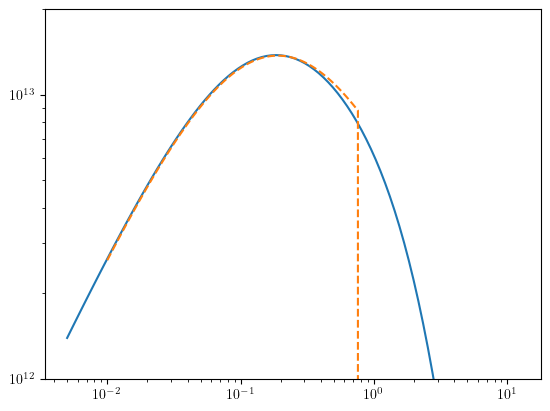

In [17]:
pl.figure()
pl.loglog(BCMP_test.r_array, (BCMP_test.r_array**2)*BCMP_test.rho_nfw_mat[:,indz,indM])
pl.loglog(r_array, (r_array**2)*prof_test_ccl, '--')
pl.ylim(1e12, 2e13)
pl.show()



In [14]:
from setup_power_spectra_jit import setup_power_BCMP

setup_power_BCMP_test = setup_power_BCMP(sim_params_dict, halo_params_dict, analysis_dict, num_points_trapz_int=64, verbose_time=True)




Time taken to calculate BCMP profile:  4.549422025680542  seconds
Time taken to setup Pk:  7.067051410675049
Time taken to setup HMF:  8.488962650299072
Time taken to setup uks and bks:  1.5639441013336182
Time taken to setup uls and bls:  1.4292616844177246
Time taken to setup power spectra:  20.85095977783203


In [16]:
Pk_nfw = setup_power_BCMP_test.Pmm_nfw_tot_mat
Pk_dmb = setup_power_BCMP_test.Pmm_dmb_tot_mat
Pk_sup = setup_power_BCMP_test.Pmm_sup_tot_mat



In [17]:
k_array_ccl = setup_power_BCMP_test.k
z = z_test
# z = 0.0
pkz_HF_ccl = ccl.nonlin_matter_power(cosmo, k=k_array_ccl*h, a=1/(1+z)) * h**3






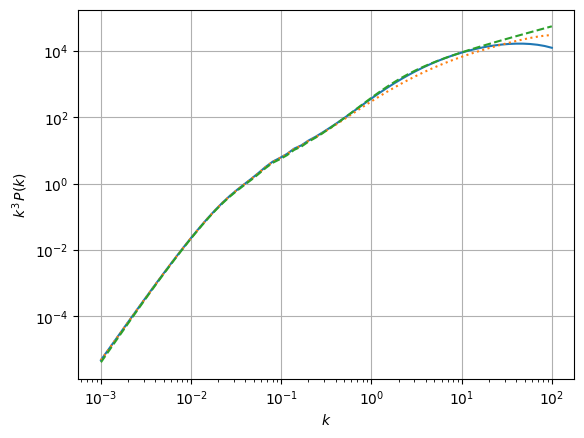

In [22]:
indz = 0
pl.figure()
pl.loglog(k_array_ccl, (k_array_ccl**3)*Pk_nfw[:,indz])
pl.loglog(k_array_ccl, (k_array_ccl**3)*Pk_dmb[:,indz], ls=':')
# pl.loglog(k_array_ccl, (k_array_ccl**3)*setup_power_BCMP_test.plin_kz_mat[:,indz])
pl.loglog(k_array_ccl, (k_array_ccl**3)*pkz_HF_ccl, '--')
pl.ylabel(r'$k^3 \, P(k)$')
pl.xlabel(r'$k$')
pl.grid()




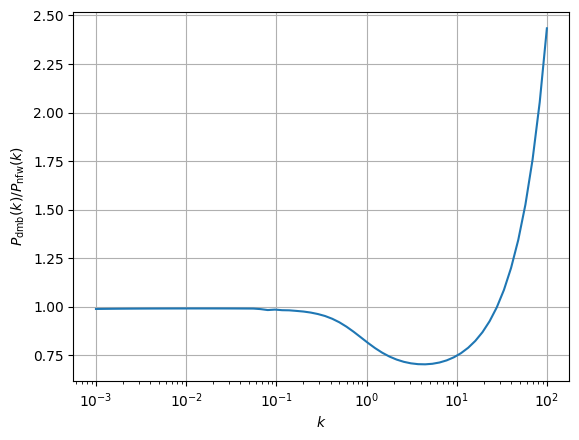

In [20]:
indz = 0
pl.figure()
pl.plot(k_array_ccl, Pk_sup[:,indz])
pl.xscale('log')
pl.ylabel(r'$P_{\rm dmb}(k)/P_{\rm nfw}(k)$')
pl.xlabel(r'$k$')
pl.grid()



In [2]:
from astropy.io import fits
df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits')
# df.info()
cov_all = df['covmat'].data
cov_xip = cov_all[0:200,0:200]
cov_xim = cov_all[200:400,200:400]
cov_gammat = cov_all[400:880,400:880]
cov_wtheta = cov_all[880:,880:]
xip_all = df['xip'].data
xim_all = df['xim'].data
gammat_all = df['gammat'].data
wtheta_all = df['wtheta'].data


In [3]:
# df['covmat'].header
bin1_xip = df['xip'].data['BIN1']
bin2_xip = df['xip'].data['BIN2']
indsel = np.where((bin1_xip == 3) & (bin2_xip == 4))[0]
xip_val = df['xip'].data['VALUE'][indsel]
xip_ang = df['xip'].data['ANG'][indsel]
sig_xip = np.sqrt(np.diag(cov_xip)[indsel])

bin1_xim = df['xim'].data['BIN1']
bin2_xim = df['xim'].data['BIN2']
indsel = np.where((bin1_xim == 4) & (bin2_xim == 4))[0]
xim_val = df['xim'].data['VALUE'][indsel]
xim_ang = df['xim'].data['ANG'][indsel]
sig_xim = np.sqrt(np.diag(cov_xim)[indsel])

bin1_gammat = df['gammat'].data['BIN1']
bin2_gammat = df['gammat'].data['BIN2']
indsel = np.where((bin1_gammat == 1) & (bin2_gammat == 4))[0]
gammat_val = df['gammat'].data['VALUE'][indsel]
gammat_ang = df['gammat'].data['ANG'][indsel]
sig_gammat = np.sqrt(np.diag(cov_gammat)[indsel])

bin1_wtheta = df['wtheta'].data['BIN1']
bin2_wtheta = df['wtheta'].data['BIN2']
indsel = np.where((bin1_wtheta == 4) & (bin2_wtheta == 4))[0]
wtheta_val = df['wtheta'].data['VALUE'][indsel]
wtheta_ang = df['wtheta'].data['ANG'][indsel]
sig_wtheta = np.sqrt(np.diag(cov_wtheta)[indsel])



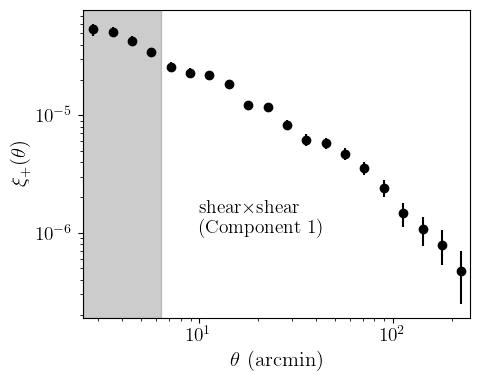

In [46]:
pl.figure(figsize=(5,4))
pl.errorbar(xip_ang, xip_val, yerr=sig_xip, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.ylabel(r'$\xi_+(\theta)$', fontsize=15)
pl.axvspan(2.5, 6.3, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.text(10, 1e-6, r'shear$\times$shear' + '\n' + '(Component 1)', fontsize=14)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/xip_34.pdf', bbox_inches='tight')

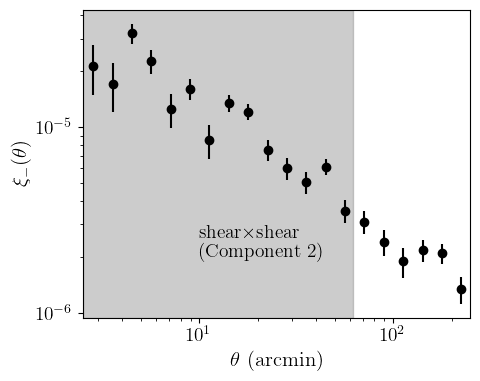

In [47]:
pl.figure(figsize=(5,4))
pl.errorbar(xim_ang, xim_val, yerr=sig_xip, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.ylabel(r'$\xi_{-}(\theta)$', fontsize=15)
pl.axvspan(2.5, 62.16, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.text(10, 2e-6, r'shear$\times$shear' + '\n' + '(Component 2)', fontsize=14)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/xim_44.pdf', bbox_inches='tight')

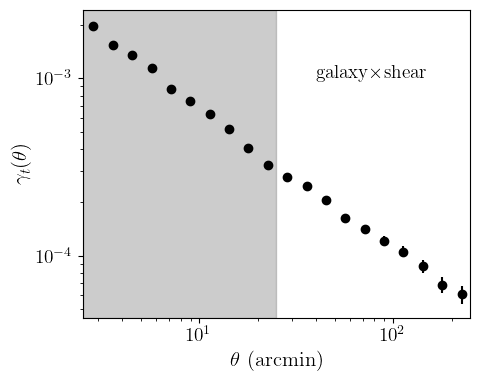

In [48]:
pl.figure(figsize=(5,4))
pl.errorbar(gammat_ang, gammat_val, sig_gammat, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.ylabel(r'$\gamma_{t}(\theta)$', fontsize=15)
pl.axvspan(2.5, 24.75, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.text(40, 1e-3, r'galaxy$\times$shear', fontsize=14)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/gammat_14.pdf', bbox_inches='tight')


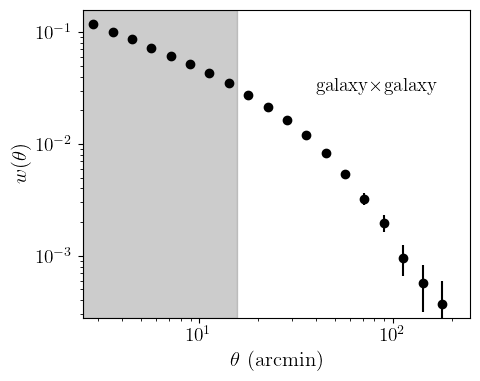

In [49]:
pl.figure(figsize=(5,4))
pl.errorbar(wtheta_ang, wtheta_val, sig_wtheta, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.ylabel(r'$w(\theta)$', fontsize=15)
pl.axvspan(2.5, 15.61, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.text(40, 3e-2, r'galaxy$\times$galaxy', fontsize=14)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/wtheta_44.pdf', bbox_inches='tight')


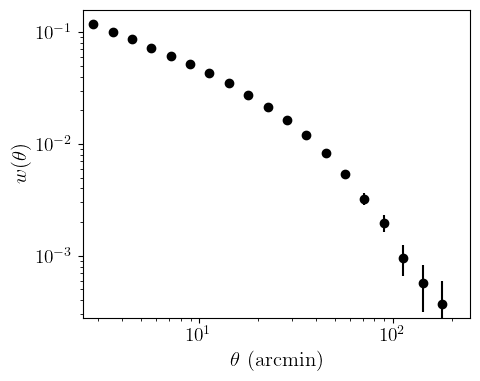

In [6]:
pl.figure(figsize=(5,4))
pl.errorbar(wtheta_ang, wtheta_val, sig_wtheta, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.ylabel(r'$w(\theta)$', fontsize=15)
# pl.axvspan(2.5, 15.61, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
# pl.text(40, 3e-2, r'galaxy$\times$galaxy', fontsize=14)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/wtheta_44_nosc.pdf', bbox_inches='tight')




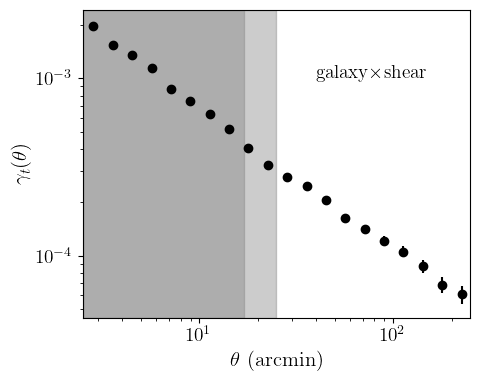

In [10]:
pl.figure(figsize=(5,4))
pl.errorbar(gammat_ang, gammat_val, sig_gammat, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.ylabel(r'$\gamma_{t}(\theta)$', fontsize=15)
pl.axvspan(2.5, 17, alpha=0.4, color='gray')
pl.axvspan(2.5, 24.75, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.text(40, 1e-3, r'galaxy$\times$shear', fontsize=14)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/gammat_14_sc.pdf', bbox_inches='tight')



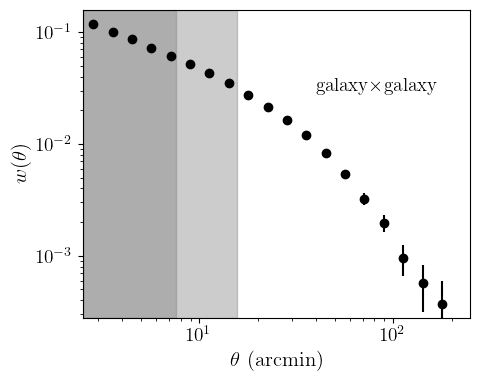

In [12]:
pl.figure(figsize=(5,4))
pl.errorbar(wtheta_ang, wtheta_val, sig_wtheta, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.ylabel(r'$w(\theta)$', fontsize=15)
pl.axvspan(2.5, 15.61, alpha=0.4, color='gray')
pl.axvspan(2.5, 7.55, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.text(40, 3e-2, r'galaxy$\times$galaxy', fontsize=14)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/wtheta_44_sc.pdf', bbox_inches='tight')


Text(5, 0.004, 'galaxy$\\times$galaxy')

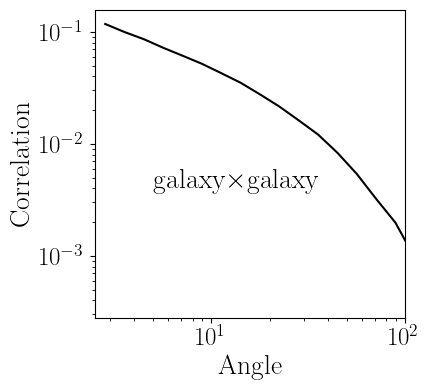

In [22]:
pl.figure(figsize=(4,4))
pl.errorbar(wtheta_ang, wtheta_val,  fmt='', ls='-', color='black' )
pl.xscale('log')
pl.yscale('log')
# pl.xlabel(r'$\theta$ (arcmin)', fontsize=20)
# pl.ylabel(r'$w(\theta)$', fontsize=20)
pl.xlabel(r'Angle', fontsize=20)
pl.ylabel(r'Correlation', fontsize=20)

# pl.axvspan(2.5, 15.61, alpha=0.4, color='gray')
pl.xlim(2.5, 100)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=18)
pl.tick_params(axis='both', which='minor', labelsize=18)
pl.text(5, 4e-3, r'galaxy$\times$galaxy', fontsize=20)
# pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/wtheta_44.pdf', bbox_inches='tight')


Text(5, 0.002, 'galaxy$\\times$galaxy')

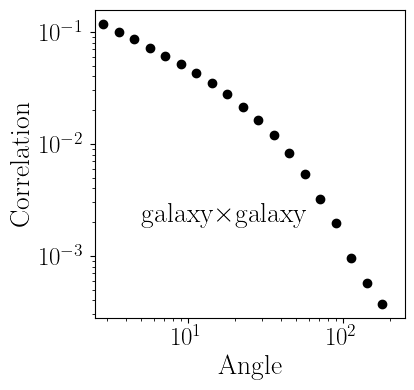

In [21]:
pl.figure(figsize=(4,4))
pl.errorbar(wtheta_ang, wtheta_val, fmt='o', ls='', color='black' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'Angle', fontsize=20)
pl.ylabel(r'Correlation', fontsize=20)
# pl.axvspan(2.5, 15.61, alpha=0.4, color='gray')
pl.xlim(2.5, 250)
# pl.ylim(1e-3, 1e-1)
# pl.grid()
# set ticklabel sizes of both major and minor ticks
pl.tick_params(axis='both', which='major', labelsize=18)
pl.tick_params(axis='both', which='minor', labelsize=18)
pl.text(5, 2e-3, r'galaxy$\times$galaxy', fontsize=20)
# pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/temp/wtheta_44.pdf', bbox_inches='tight')


In [25]:
from colossus.cosmology import cosmology

cosmo = cosmology.setCosmology('planck18', persistence = 'r')
k = 10**np.linspace(-5.0, 2.0, 500)
Pk = cosmo.matterPowerSpectrum(k)



In [29]:
import pyccl as ccl
import numpy as np
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05,
                          h=0.7, n_s=0.95, sigma8=0.8,
                          transfer_function='bbks')
cosmo.sigma8()
z = 0
k_array = np.logspace(-4, 2, 100)
Pk_nonlin = ccl.nonlin_matter_power(cosmo, k=k_array, a=1/(1+z))


In [31]:
Pk_lin = ccl.linear_matter_power(cosmo, k=k_array, a=1/(1+z))


Text(0, 0.5, 'Power Spectrum: $P(k)$')

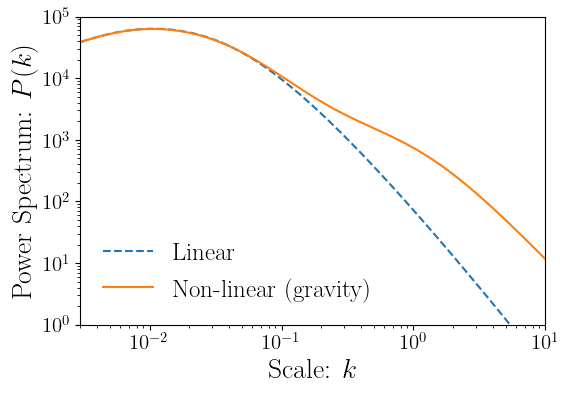

In [47]:
pl.figure(figsize=(6,4))
pl.plot(k_array, Pk_lin, ls = '--', label='Linear')
pl.plot(k_array, Pk_nonlin, label='Non-linear (gravity)')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'Scale: $k$', fontsize=20)
pl.legend(fontsize=18, frameon=False)
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)
pl.xlim(3e-3, 10)
pl.ylim(1e0, 1e5)
pl.ylabel(r'Power Spectrum: $P(k)$', fontsize=20)
